In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >8.451531 ,'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
m3=pd.DataFrame(m2)
m4=m3.loc[m3['Quadrant']=='LowTenure-HighLR']
x=pd.DataFrame(m4)

print x.head()


     LossRatio  Duration             PetId   StartDate     EndDate  \
3     0.911322       128     CAN289501Arlo  2018-03-22  2019-03-21   
88    0.972395       382  US1721840Liberty  2016-06-01  2017-06-17   
94    4.759177       199    CAN164837Tommy  2015-12-19  2016-07-04   
181   8.559491       276      US162004Mojo  2017-10-25  2018-10-24   
195   1.922764       227   US2183299Casper  2017-12-13  2018-12-12   

    LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium  \
3          146136             310.255          340.444932   
88         441731             268.480          276.101699   
94          33941            1283.987          269.791803   
181        540460            3918.704          457.819726   
195        569118             326.956          170.044767   

                          BreedName  Currentage ...      Surname  GivenName  \
3                           Mastiff         1.0 ...     Streisel    Jasmine   
88            Yorkshire Terrier Mix         1.0 ...   

In [3]:
x['LossRatio'].max()

526.2746201058766

In [4]:
len(x.loc[x['L']==1])

4189

In [5]:
len(x)

16161

In [6]:

x.isnull().sum()

LossRatio                           0
Duration                            0
PetId                               0
StartDate                           0
EndDate                             0
LastPolicyRef                       0
TotalClaimsAmtPaid                  0
TotalEarnedPremium                  0
BreedName                           0
Currentage                          0
CopayPct                            0
Deductible                          0
PetType                             0
PolicyForm                          0
CarrierCd                           0
ClaimNumber                         0
ClaimAmount                         0
ClaimDetails                        0
ConditionGrp                        0
Claimcodecategory                   0
Severity                           46
CustomerNumber                     61
Country                            61
PhoneNumber                        92
Surname                            63
GivenName                          67
CustomerMail

In [7]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)



In [8]:
p=pd.DataFrame(x)

In [9]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [10]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [11]:


p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [12]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [13]:
p.dropna(how='any',inplace=True)

In [14]:
p.isnull().sum()

Duration              0
TotalClaimsAmtPaid    0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
churn\r               0
L                     0
dtype: int64

In [15]:
p.drop(['Quadrant','TotalClaimsAmtPaid','TotalEarnedPremium'],axis=1,inplace=True)

In [16]:
print p.shape

(16100, 11)


In [17]:

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3,max_depth=4,ntrees=130)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,14 mins 44 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_jash_vy1417
H2O cluster total nodes:,1
H2O cluster free memory:,1.338 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@2e9d147b
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_9e873a9ba0b4da5ce33f3ca01ec74fdd at line 0 ( destination line 0 )  at byte offset 111; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_9e873a9ba0b4da5ce33f3ca01ec74fdd at line 2 ( destination line 2 )  at byte offset 117; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,churn,L
nan,BreedName,nan,nan,nan,PetType,nan,CarrierCd,Country,nan,nan
nan,,nan,nan,nan,,nan,,,nan,nan
128,Mastiff,1,0.9,400,Dog,20000,CAN,CAN,0,0
382,Yorkshire Terrier Mix,1,0.9,200,Dog,20000,XLC,US,1,0
199,Mixed Breed Medium (23 - 70lb),0,0.9,100,Dog,nan,AGR,CAN,1,0
276,Mixed Breed Medium (23 - 70lb),2,0.8,250,Dog,15000,XLC,US,0,1
227,Domestic Shorthair,0,0.8,300,Cat,15000,XLC,US,0,0
366,Cockapoo,11,0.7,500,Dog,15000,XLC,US,1,0
182,Domestic Shorthair,12,1,200,Cat,nan,ALZ,US,1,1
383,Savannah,1,0.9,300,Cat,nan,XLC,US,1,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [42]:
# Use same data as above

# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': range(1, 4),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()  #0.7811331652127048

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


0.8429966435509801

In [43]:
best_gbm2.confusion_matrix()
performance = best_gbm2.model_performance(test_data=test)
print performance



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.130992304711
RMSE: 0.361928590624
LogLoss: 0.412327916218
Mean Per-Class Error: 0.241580005756
AUC: 0.842996643551
Gini: 0.685993287102
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.337801100339: 


,0,1,Error,Rate
0,1088.0,149.0,0.1205,(149.0/1237.0)
1,173.0,268.0,0.3923,(173.0/441.0)
Total,1261.0,417.0,0.1919,(322.0/1678.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3378011,0.6247086,166.0
max f2,0.1853354,0.7372506,262.0
max f0point5,0.5107990,0.6745738,101.0
max accuracy,0.4635352,0.8206198,116.0
max precision,0.9496450,1.0,0.0
max recall,0.0225018,1.0,386.0
max specificity,0.9496450,1.0,0.0
max absolute_mcc,0.3625822,0.4965483,155.0
max min_per_class_accuracy,0.2574378,0.7505669,212.0
max mean_per_class_accuracy,0.2469333,0.7584200,219.0


Gains/Lift Table: Avg response rate: 26.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101311,0.9100229,3.8049887,3.8049887,1.0,1.0,0.0385488,0.0385488,280.4988662,280.4988662
,2,0.0202622,0.8574498,3.5811658,3.6930772,0.9411765,0.9705882,0.0362812,0.0748299,258.1165800,269.3077231
,3,0.0327771,0.8421603,3.6237987,3.6666254,0.9523810,0.9636364,0.0453515,0.1201814,262.3798726,266.6625438
,4,0.0411204,0.8047001,3.5332038,3.6395544,0.9285714,0.9565217,0.0294785,0.1496599,253.3203758,263.9554372
,5,0.0500596,0.7617196,3.8049887,3.6690962,1.0,0.9642857,0.0340136,0.1836735,280.4988662,266.9096210
,6,0.1001192,0.5832668,2.8990390,3.2840676,0.7619048,0.8630952,0.1451247,0.3287982,189.9038981,228.4067595
,7,0.1501788,0.4813844,2.0836843,2.8839398,0.5476190,0.7579365,0.1043084,0.4331066,108.3684267,188.3939819
,8,0.2002384,0.4090096,1.7666019,2.6046053,0.4642857,0.6845238,0.0884354,0.5215420,76.6601879,160.4605334
,9,0.3003576,0.2993491,1.4042220,2.2044776,0.3690476,0.5793651,0.1405896,0.6621315,40.4222006,120.4477558
,10,0.4004768,0.2487908,1.1550858,1.9421296,0.3035714,0.5104167,0.1156463,0.7777778,15.5085844,94.2129630


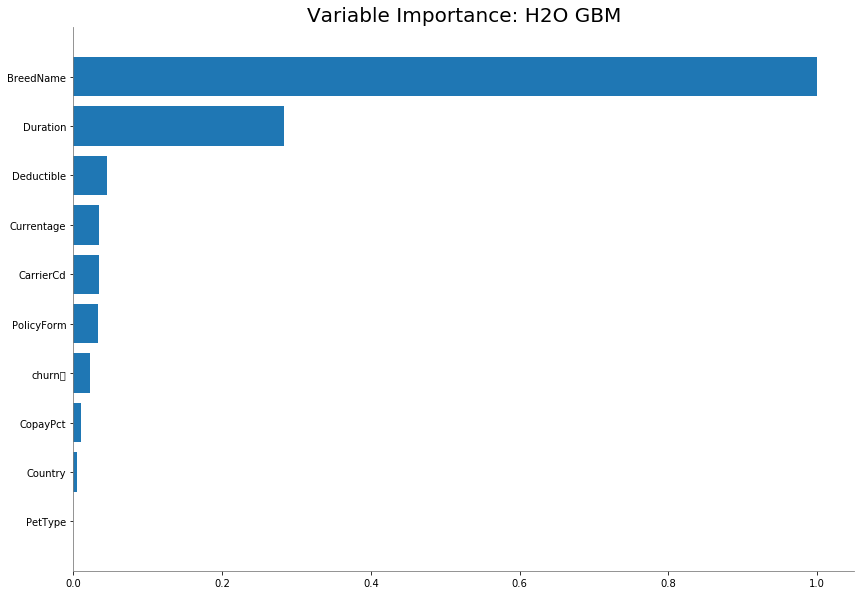

[(u'BreedName', 3544.75048828125, 1.0, 0.681133497266713),
 (u'Duration', 1003.163818359375, 0.2829998392484265, 0.19276067023319832),
 (u'Deductible', 160.00238037109375, 0.0451378399974985, 0.030744894816561476),
 (u'Currentage', 123.83834838867188, 0.0349357024699128, 0.02379587720280105),
 (u'CarrierCd', 123.06483459472656, 0.03471748857968202, 0.023647244412595986),
 (u'PolicyForm',
  116.60151672363281,
  0.032894139406739915,
  0.022405300213691557),
 (u'churn\r', 77.70362091064453, 0.0219207589271878, 0.014930963190815948),
 (u'CopayPct', 38.67036437988281, 0.010909192200614658, 0.007430616235959411),
 (u'Country', 16.398082733154297, 0.004626018893957545, 0.003150936427663195),
 (u'PetType', 0.0, 0.0, 0.0)]

In [44]:
import matplotlib.pyplot as plt
best_gbm2.varimp_plot()
best_gbm2.varimp()

In [45]:
import subprocess
from IPython.display import Image

In [46]:
mojo_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip"
h2o_jar_path= '/home/jash/Desktop/petplan/trees/h2o-3.20.0.4/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv"

In [47]:
image_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4"

In [48]:
best_gbm2.download_mojo(mojo_file_name)

'/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip'

In [49]:

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [50]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [51]:

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 0)

Success: Graphviz file /home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv is generated.


In [52]:
generateTreeImage(gv_file_path, image_file_name, 0)

Success: Image File /home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png')


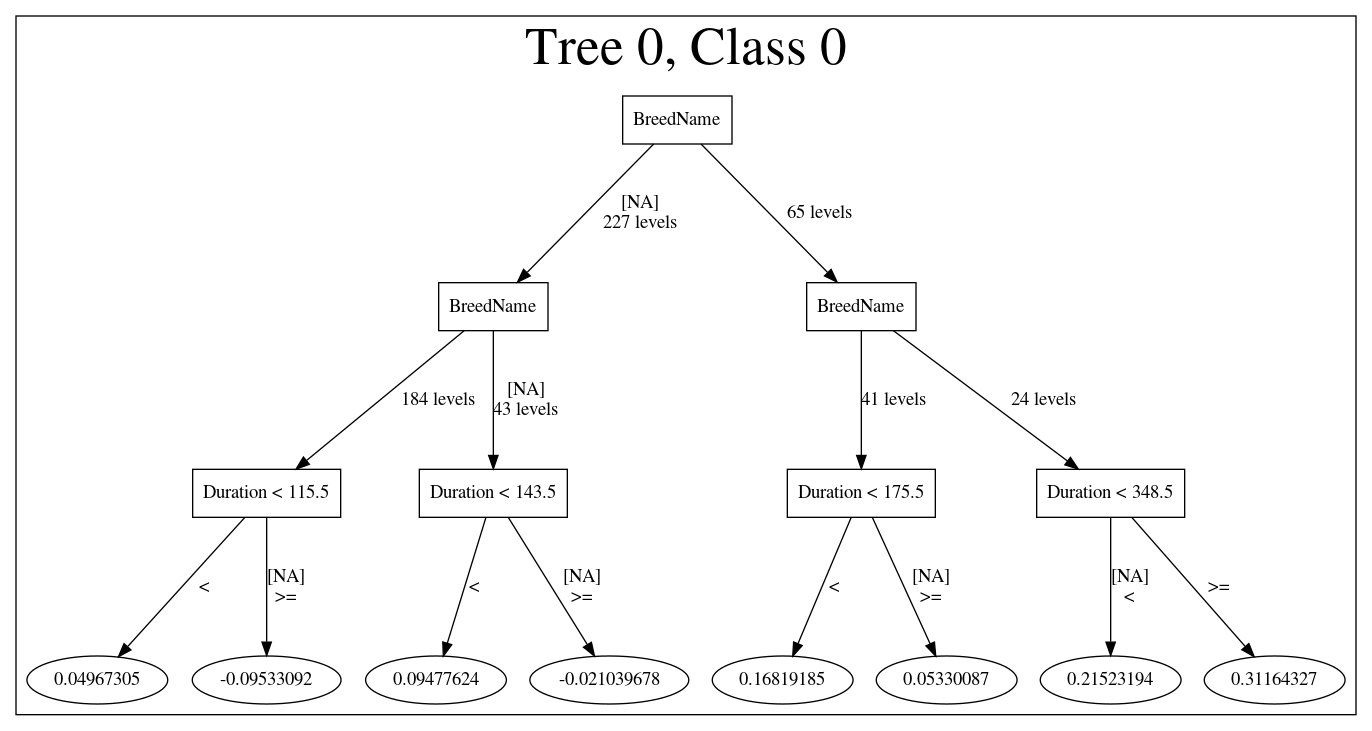

In [53]:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png')